In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics

np.random.seed(42)

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 14, 6   # set default figure size

In [2]:
df=pd.read_csv('Admission_Predict.csv') #importing csv file
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df=df.drop(columns='Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df=df.rename(columns={"GRE Score":"GRE_Score","TOEFL Score":"TOEFL_Score","University Rating":"Univer_Rating","SOP":"Statement_Of_Purpose","LOR ":"Letter_Of_Recom","Research":"Research_Experience",
"Chance of Admit ":"Chance_of_Admit"})

In [5]:
df.head()

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.dtypes

GRE_Score                 int64
TOEFL_Score               int64
Univer_Rating             int64
Statement_Of_Purpose    float64
Letter_Of_Recom         float64
CGPA                    float64
Research_Experience       int64
Chance_of_Admit         float64
dtype: object

In [7]:
cor=df.corr(method = 'pearson').round(3)
cor

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit
GRE_Score,1.000,0.827,0.635,0.613,0.525,0.826,0.563,0.810
TOEFL_Score,0.827,1.000,0.650,0.644,0.542,0.811,0.467,0.792
Univer_Rating,0.635,0.650,1.000,0.728,0.609,0.705,0.427,0.690
Statement_Of_Purpose,0.613,0.644,0.728,1.000,0.664,0.712,0.408,0.684
Letter_Of_Recom,0.525,0.542,0.609,0.664,1.000,0.637,0.373,0.645
CGPA,0.826,0.811,0.705,0.712,0.637,1.000,0.501,0.882
Research_Experience,0.563,0.467,0.427,0.408,0.373,0.501,1.000,0.546
Chance_of_Admit,0.810,0.792,0.690,0.684,0.645,0.882,0.546,1.000


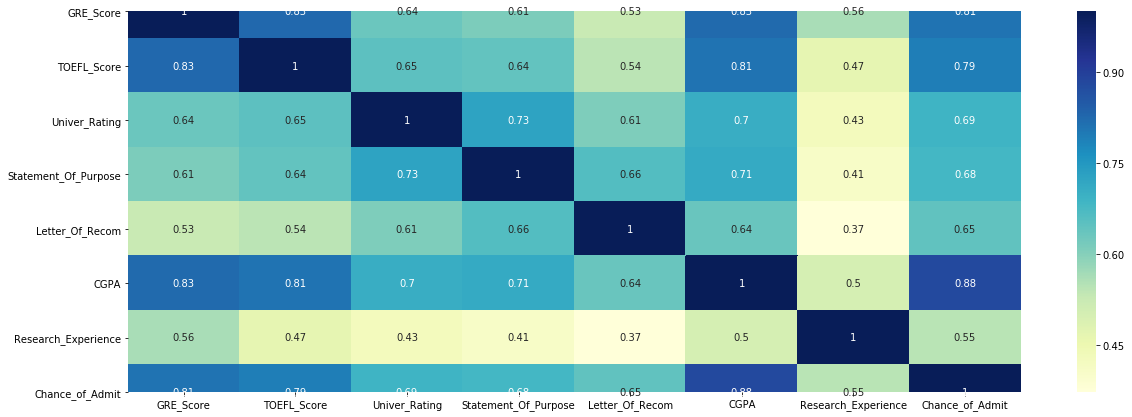

In [8]:
# Co-Relation observed using a Heat Map

fig=plt.figure(figsize=(20,7))
sns.heatmap(cor,cmap = plt.cm.YlGnBu,annot = True,linecolor='white')
plt.show()

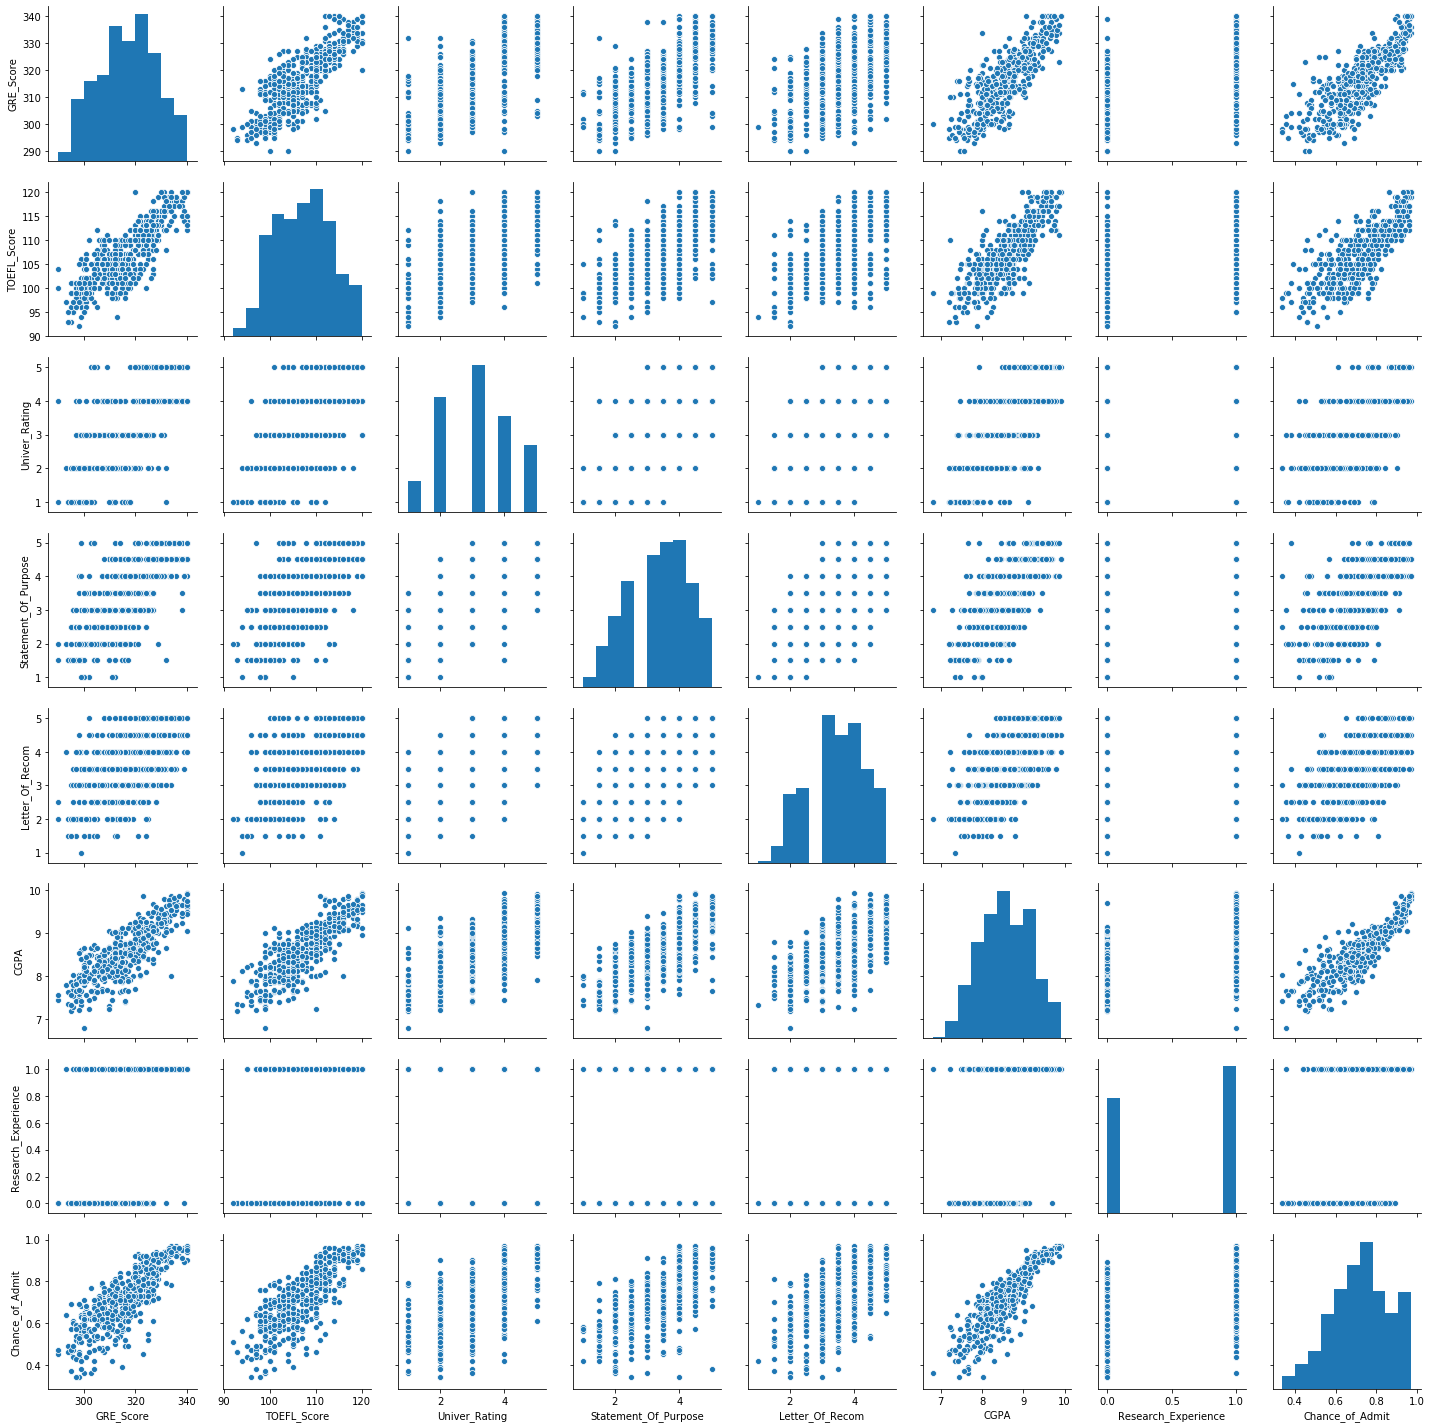

In [9]:
#To see what kind of relation do we have with each factors

sns.pairplot(df)
plt.show()

## GRE Score Analysis

In [10]:
#To See what are the max and Min values of the GRE score
print("Maximum GREScore :",max(df.GRE_Score))
print("Minimum GREScore :",min(df.GRE_Score))

Maximum GREScore : 340
Minimum GREScore : 290


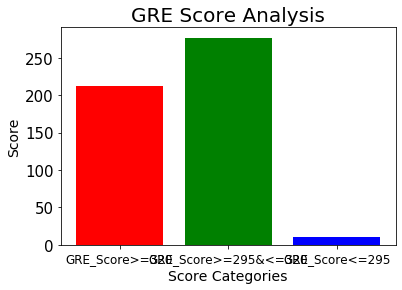

In [11]:
# Given specific names for specific categories of Gre Scores

maxvalues=df[df.GRE_Score>=320]
meanvalues=df[(df.GRE_Score>295)&(df.GRE_Score<320)]
minvalues=df[(df.GRE_Score<=295)]

# Analysed the Gre Score with Max Values, Min Values and Mean Values

y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['GRE_Score>=320','GRE_Score>=295&<=320','GRE_Score<=295']
plt.bar(x,y,color=['red','green','blue'])

# This piece of code is to set the plot variables.
plt.title('GRE Score Analysis',fontsize = 20)
plt.xlabel('Score Categories',fontsize = 14)
plt.ylabel('Score',fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
plt.show()

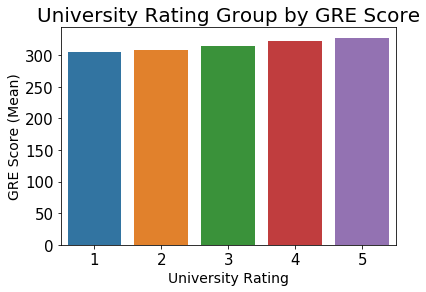

In [12]:
# University Rating Grouped by GRE Score

df.groupby('Univer_Rating')['GRE_Score'].mean()
sns.barplot(x=df.groupby('Univer_Rating')['GRE_Score'].mean().index,y=df.groupby('Univer_Rating')['GRE_Score'].mean().values)

# This piece of code is to set the plot variables.
plt.ylabel('GRE Score (Mean)',fontsize = 14)
plt.title('University Rating Group by GRE Score',fontsize = 20)
plt.xlabel('University Rating',fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

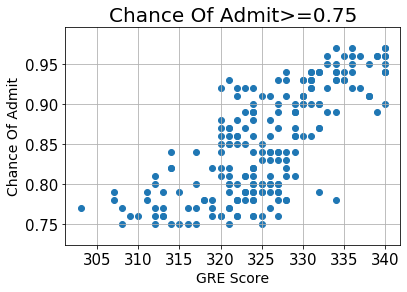

In [13]:
# This code plots the scatter plot between chance of admit and GRE score.
plt.scatter(x=df[df.Chance_of_Admit>=0.75].GRE_Score,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)

# This piece of code is to set the plot variables.
plt.xlabel("GRE Score",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## TOEFL Score Analysis

In [14]:
print("Maximum TOEFL Score :",max(df.TOEFL_Score))
print("Minimum TOEFL Score :",min(df.TOEFL_Score))

Maximum TOEFL Score : 120
Minimum TOEFL Score : 92


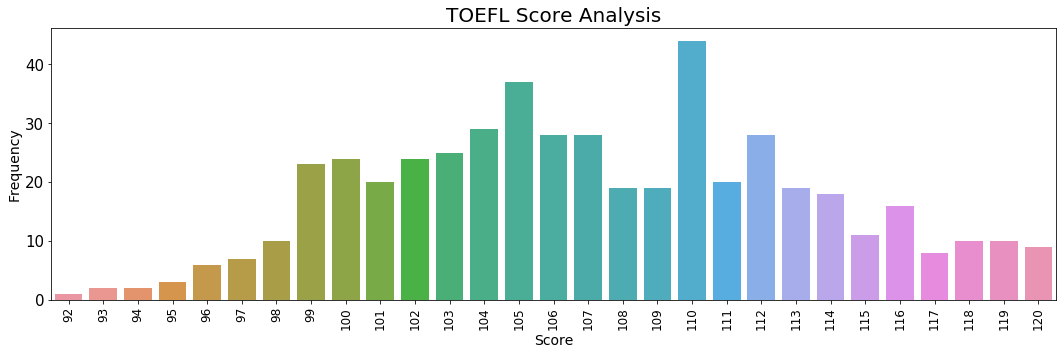

In [15]:
# Analysed Toefl Score with what number of students.

plt.figure(figsize=(18,5))
sns.barplot(x=df.TOEFL_Score.value_counts().index,y=df.TOEFL_Score.value_counts().values)

# This piece of code is to set the plot variables.
plt.title('TOEFL Score Analysis',fontsize = 20)
plt.xlabel('Score',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
plt.xticks(fontsize = 12,rotation=90)
plt.yticks(fontsize = 15)
plt.show()

C:\Users\adhundi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


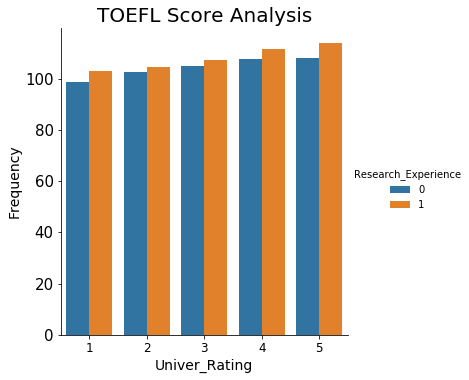

In [16]:
# Toefl Score analysied if Experience in research is Present

rate = df.groupby(['Univer_Rating','Research_Experience']).mean().reset_index()
sns.factorplot(x='Univer_Rating', y='TOEFL_Score', hue='Research_Experience', data=rate, kind='bar')

# This piece of code is to set the plot variables.
plt.title('TOEFL Score Analysis',fontsize = 20)
plt.xlabel('Univer_Rating',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
plt.show()

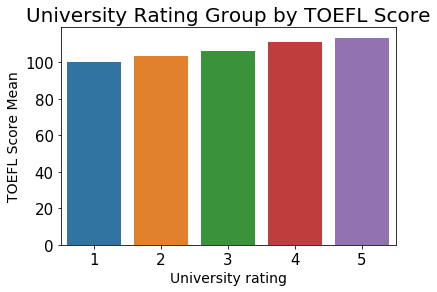

In [17]:
# University Rating Group by TOEFL Score

df.groupby('Univer_Rating')['TOEFL_Score'].mean()
sns.barplot(x=df.groupby('Univer_Rating')['TOEFL_Score'].mean().index,y=df.groupby('Univer_Rating')['TOEFL_Score'].mean().values)

# This piece of code is to set the plot variables.

plt.ylabel('TOEFL Score Mean',fontsize = 14)
plt.title('University Rating Group by TOEFL Score',fontsize = 20)
plt.xlabel('University rating',fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

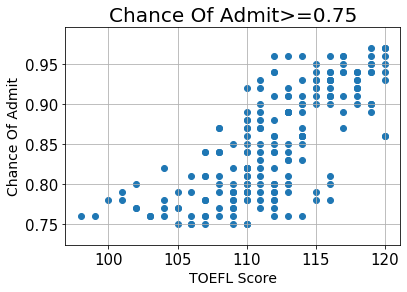

In [18]:
# Chance of Admit more than 75% with Toefl Score

plt.scatter(x=df[df.Chance_of_Admit>=0.75].TOEFL_Score,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)

# This piece of code is to set the plot variables.
plt.xlabel("TOEFL Score",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

C:\Users\adhee\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


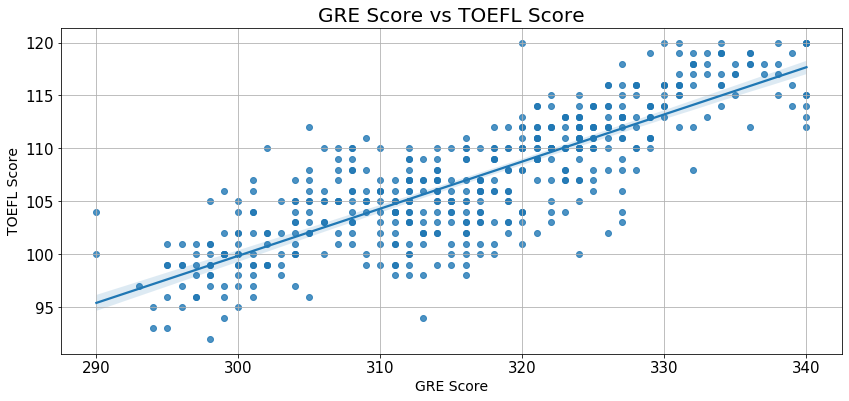

In [36]:
# GRE Vs TOEFL Score in a fitted line plot 

fig = sns.regplot(x=df["GRE_Score"], y=df["TOEFL_Score"])

# This piece of code is to set the plot variables.
plt.title("GRE Score vs TOEFL Score",fontsize = 20)
plt.xlabel('GRE Score',fontsize = 14)
plt.ylabel('TOEFL Score',fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)
plt.show()

## LOR , SOP & CGPA Analysis

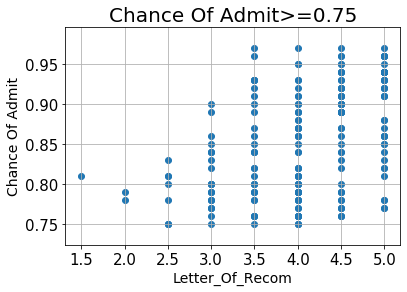

In [20]:
# Chance of Admit more than 75% if Letter_Of_Recom Present

plt.scatter(x=df[df.Chance_of_Admit>=0.75].Letter_Of_Recom,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)
# This piece of code is to set the plot variables.

plt.xlabel("Letter_Of_Recom",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

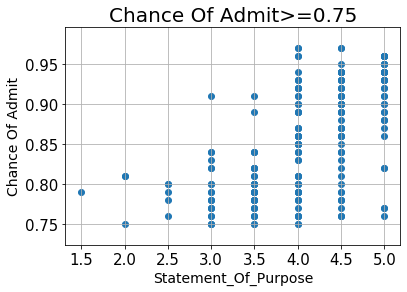

In [21]:
# Chance of Admit more than 75% if Statement_Of_Purpose Present

plt.scatter(x=df[df.Chance_of_Admit>=0.75].Statement_Of_Purpose,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)
# This piece of code is to set the plot variables.

plt.xlabel("Statement_Of_Purpose",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

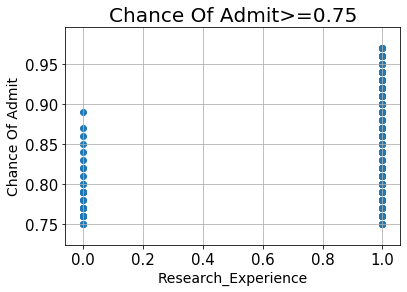

In [22]:
# Chance of Admit more than 75% if Research Experience Present

plt.scatter(x=df[df.Chance_of_Admit>=0.75].Research_Experience,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)
# This piece of code is to set the plot variables.

plt.xlabel("Research_Experience",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

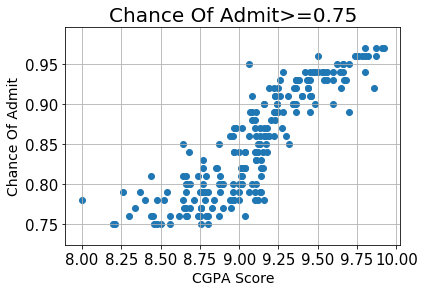

In [23]:
# Chance Of Admit more than 75% with CGPA

plt.scatter(x=df[df.Chance_of_Admit>=0.75].CGPA,y=df[df.Chance_of_Admit>=0.75].Chance_of_Admit)

# This piece of code is to set the plot variables.
plt.xlabel("CGPA Score",fontsize = 14)
plt.ylabel("Chance Of Admit",fontsize = 14)
plt.title("Chance Of Admit>=0.75",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Research Experience Analysis

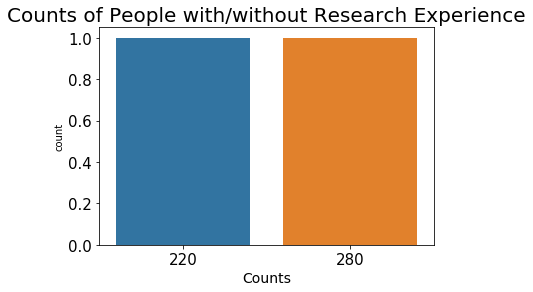

In [24]:
# Total count of Students with Research Experience
sns.countplot(df.Research_Experience.value_counts())

# This piece of code is to set the plot variables.
plt.xlabel("Counts",fontsize = 14)
plt.title("Counts of People with/without Research Experience",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

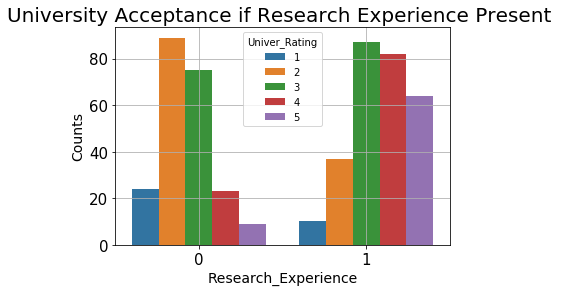

In [25]:
# University Acceptance if Research Experience Present

sns.countplot(x='Research_Experience', hue='Univer_Rating', data=df)
# This piece of code is to set the plot variables.
plt.xlabel("Research_Experience",fontsize = 14)
plt.ylabel("Counts",fontsize = 14)
plt.title("University Acceptance if Research Experience Present ",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
plt.show()

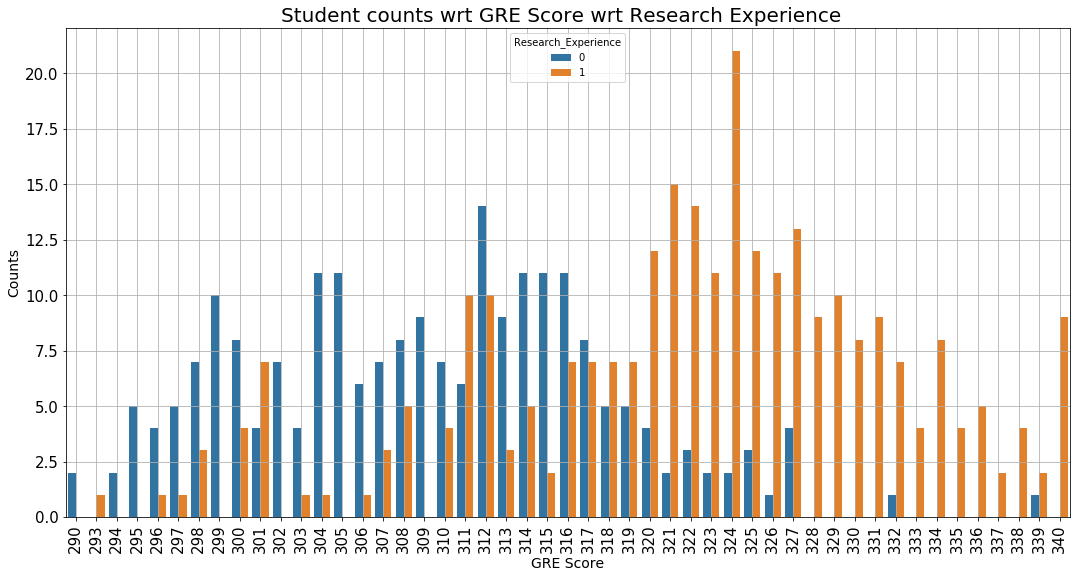

In [26]:
# GRE Score count if Research Experience Yes and No

plt.figure(figsize=(18,9))
sns.countplot(df.GRE_Score,hue=df.Research_Experience)
# This piece of code is to set the plot variables.
plt.xlabel("GRE Score",fontsize = 14)
plt.ylabel("Counts",fontsize = 14)
plt.title("Student counts wrt GRE Score wrt Research Experience  ",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.show()

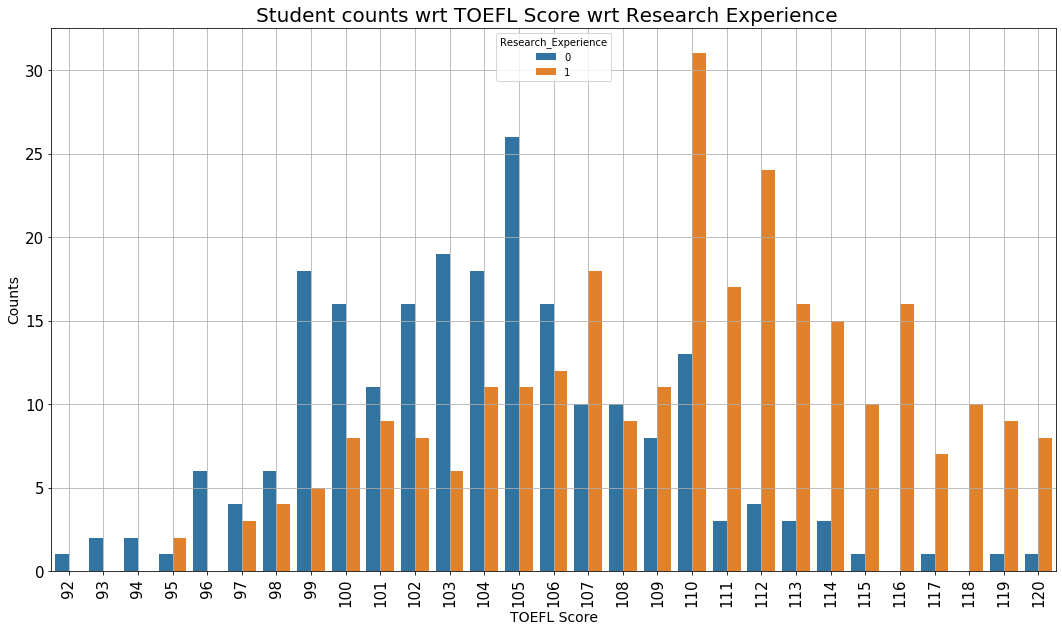

In [27]:
# TOEFL Score count if Research Experience Yes and No

plt.figure(figsize=(18,10))
sns.countplot(df.TOEFL_Score,hue=df.Research_Experience)
# This piece of code is to set the plot variables.
plt.xlabel("TOEFL Score",fontsize = 14)
plt.ylabel("Counts",fontsize = 14)
plt.title("Student counts wrt TOEFL Score wrt Research Experience  ",fontsize = 20)
plt.grid(True)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 15)
plt.show()

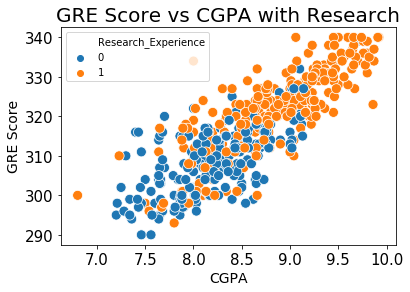

In [28]:
#CGPA VS GRE if Research Experience Present

sns.scatterplot(x="CGPA", y="GRE_Score",hue="Research_Experience",s = 100,data=df)

# This piece of code is to set the plot variables.

plt.title("GRE Score vs CGPA with Research",fontsize = 20)
plt.xlabel('CGPA',fontsize = 14)
plt.ylabel('GRE Score',fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## OLS Linear Regression Model

## Model 1 : With Interactions

In [29]:
df.dropna(inplace=True)
model_f ='Chance_of_Admit ~ GRE_Score + TOEFL_Score + Univer_Rating + Statement_Of_Purpose + Letter_Of_Recom+CGPA+Research_Experience+GRE_Score*TOEFL_Score+TOEFL_Score*Univer_Rating+Statement_Of_Purpose*Univer_Rating +Statement_Of_Purpose*Letter_Of_Recom+ Letter_Of_Recom*CGPA+ CGPA*Research_Experience+ GRE_Score*Univer_Rating+GRE_Score*Statement_Of_Purpose+GRE_Score*Letter_Of_Recom+GRE_Score*CGPA+GRE_Score*Research_Experience+TOEFL_Score*Statement_Of_Purpose+TOEFL_Score*Letter_Of_Recom+TOEFL_Score*CGPA+TOEFL_Score*Research_Experience+Univer_Rating*Letter_Of_Recom+Univer_Rating*CGPA+Univer_Rating*Research_Experience+Letter_Of_Recom*Research_Experience'
result1=smf.ols(formula=model_f,data= df).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     90.73
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.54e-165
Time:                        11:57:19   Log-Likelihood:                 717.43
No. Observations:                 500   AIC:                            -1381.
Df Residuals:                     473   BIC:                            -1267.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [30]:
# Printing all the required metrics
n=len('CGPA ')
MSE3=result1.ssr/n
MSE3=np.round(MSE3,3)
R23= result1.rsquared
R23=np.round(R23,3)
R2adj3=result1.rsquared_adj
R2adj3=np.round(R2adj3,4)
AIC3= result1.aic
AIC3=np.round(AIC3,3)
BIC3= result1.bic
BIC3=np.round(BIC3,3)
print ("MSE:  ", MSE3)
print( 'R2:   ', R23)
print( 'R2adj:',R2adj3)
print( 'AIC:  ',AIC3)
print( 'BIC:  ',BIC3)

MSE:   0.332
R2:    0.833
R2adj: 0.8238
AIC:   -1380.864
BIC:   -1267.07


## Model 2

In [37]:
df.dropna(inplace=True)
model_f ='Chance_of_Admit~ GRE_Score + TOEFL_Score + Univer_Rating + Statement_Of_Purpose + Letter_Of_Recom+CGPA+Research_Experience'
result2=smf.ols(formula=model_f,data= df).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          8.21e-180
Time:                        18:44:35   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2757 

In [32]:
# Printing all the required Metrics
n=len('CGPA ')
MSE3=result2.ssr/n
MSE3=np.round(MSE3,3)
R23= result2.rsquared
R23=np.round(R23,3)
R2adj3=result2.rsquared_adj
R2adj3=np.round(R2adj3,4)
AIC3= result2.aic
AIC3=np.round(AIC3,3)
BIC3= result2.bic
BIC3=np.round(BIC3,3)
print ("MSE:  ", MSE3)
print( 'R2:   ', R23)
print( 'R2adj:',R2adj3)
print( 'AIC:  ',AIC3)
print( 'BIC:  ',BIC3)

MSE:   0.354
R2:    0.822
R2adj: 0.8194
AIC:   -1386.77
BIC:   -1353.053


## Model 3

In [33]:
df.dropna(inplace=True)
model_f ='Chance_of_Admit~ GRE_Score + TOEFL_Score + Letter_Of_Recom+Univer_Rating+CGPA+Research_Experience'
result3=smf.ols(formula=model_f,data= df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          4.29e-181
Time:                        11:57:20   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2800    

In [34]:
# Printing all the required metrics
n=len('CGPA ')
MSE3=result3.ssr/n
MSE3=np.round(MSE3,3)
R23= result3.rsquared
R23=np.round(R23,3)
R2adj3=result3.rsquared_adj
R2adj3=np.round(R2adj3,4)
AIC3= result3.aic
AIC3=np.round(AIC3,3)
BIC3= result3.bic
BIC3=np.round(BIC3,3)
print ("MSE:  ", MSE3)
print( 'R2:   ', R23)
print( 'R2adj:',R2adj3)
print( 'AIC:  ',AIC3)
print( 'BIC:  ',BIC3)

MSE:   0.354
R2:    0.822
R2adj: 0.8197
AIC:   -1388.647
BIC:   -1359.145


## Model 4

In [35]:
df.dropna(inplace=True)
model_f ='Chance_of_Admit~ GRE_Score + TOEFL_Score + Letter_Of_Recom+Statement_Of_Purpose+CGPA+Research_Experience'
result4=smf.ols(formula=model_f,data= df).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     376.9
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.37e-180
Time:                        11:57:20   Log-Likelihood:                 700.15
No. Observations:                 500   AIC:                            -1386.
Df Residuals:                     493   BIC:                            -1357.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3131 

In [36]:
n=len('CGPA ')
MSE3=result4.ssr/n
MSE3=np.round(MSE3,3)
R23= result4.rsquared
R23=np.round(R23,3)
R2adj3=result4.rsquared_adj
R2adj3=np.round(R2adj3,4)
AIC3= result4.aic
AIC3=np.round(AIC3,3)
BIC3= result4.bic
BIC3=np.round(BIC3,3)
print ("MSE:  ", MSE3)
print( 'R2:   ', R23)
print( 'R2adj:',R2adj3)
print( 'AIC:  ',AIC3)
print( 'BIC:  ',BIC3)

MSE:   0.356
R2:    0.821
R2adj: 0.8188
AIC:   -1386.294
BIC:   -1356.792


## Model 5

In [37]:
df.dropna(inplace=True)
model_f ='Chance_of_Admit~ GRE_Score + TOEFL_Score + Letter_Of_Recom+CGPA+Research_Experience'
result5=smf.ols(formula=model_f,data= df).fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          9.97e-182
Time:                        11:57:20   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3357    

In [38]:
n=len('CGPA ')
MSE3=result5.ssr/n
MSE3=np.round(MSE3,3)
R23= result5.rsquared
R23=np.round(R23,3)
R2adj3=result5.rsquared_adj
R2adj3=np.round(R2adj3,4)
AIC3= result5.aic
AIC3=np.round(AIC3,3)
BIC3= result5.bic
BIC3=np.round(BIC3,3)
print ("MSE:  ", MSE3)
print( 'R2:   ', R23)
print( 'R2adj:',R2adj3)
print( 'AIC:  ',AIC3)
print( 'BIC:  ',BIC3)

MSE:   0.357
R2:    0.821
R2adj: 0.8188
AIC:   -1387.299
BIC:   -1362.011


## Train-Test-Slpit Linear Regression Model

## Model - 1

In [39]:
# Initially preparing teh dataset
X1_ads=df[['GRE_Score','TOEFL_Score','Univer_Rating','Statement_Of_Purpose','Letter_Of_Recom','CGPA','Research_Experience']]
Y1_ads=df.Chance_of_Admit

In [40]:
# Splitting teh data using Test-train-split function
ex_train1,ex_test1,ey_train1,ey_test1=train_test_split(X1_ads,Y1_ads,test_size=0.3)

# Building teh Linear regression model
lr1=linear_model.LinearRegression()
lr11=lr1.fit(ex_train1,ey_train1)

# printing all the required metrics
print('coefficient',lr11.coef_.round(3))
print('lr1.intercept',lr11.intercept_.round(3))
print('r21_score',metrics.r2_score(ey_test1,lr11.predict(ex_test1)).round(3))
print('MSE1',metrics.mean_squared_error(ey_test1,lr11.predict(ex_test1)).round(3))

coefficient [0.002 0.003 0.003 0.002 0.015 0.116 0.021]
lr1.intercept -1.422
r21_score 0.826
MSE1 0.004


## Model - 2

In [41]:
# Initial pre-processing of data
X2_ads=df[['GRE_Score','TOEFL_Score','Univer_Rating','Letter_Of_Recom','CGPA','Research_Experience']]
Y2_ads=df.Chance_of_Admit

# splitting the data using test-train-split and then building the LR model
ex_train2,ex_test2,ey_train2,ey_test2=train_test_split(X2_ads,Y2_ads,test_size=0.3)
lr2=linear_model.LinearRegression()
lr22=lr2.fit(ex_train2,ey_train2)

# Printing all the required values
print('coefficient',lr22.coef_.round(3))
print('lr2.intercept',lr22.intercept_.round(3))
print('r22_score', metrics.r2_score(ey_test2,lr22.predict(ex_test2)).round(3))
print('MSE2',metrics.mean_squared_error(ey_test2,lr22.predict(ex_test2)).round(3))

coefficient [0.002 0.003 0.005 0.018 0.124 0.023]
lr2.intercept -1.331
r22_score 0.808
MSE2 0.003


## Model - 3

In [42]:
# Initial pre-processing the data
X3_ads=df[['GRE_Score','TOEFL_Score','Statement_Of_Purpose','Letter_Of_Recom','CGPA','Research_Experience']]
Y3_ads=df.Chance_of_Admit

# Splitting the data using test-train-split and then building the LR model.
ex_train3,ex_test3,ey_train3,ey_test3=train_test_split(X3_ads,Y3_ads,test_size=0.3)
lr3=linear_model.LinearRegression()
lr33=lr3.fit(ex_train3,ey_train3)

# Printing all teh required values
print('coefficient',lr33.coef_.round(3))
print('lr3.intercept',lr33.intercept_.round(3))
print('r23_score', metrics.r2_score(ey_test3,lr33.predict(ex_test3)).round(3))
print('MSE3',metrics.mean_squared_error(ey_test3,lr33.predict(ex_test3)).round(3))

coefficient [0.001 0.003 0.005 0.016 0.126 0.032]
lr3.intercept -1.249
r23_score 0.82
MSE3 0.003


## Model - 4

In [43]:
# Initial pre-processing of the data
X4_ads=df[['GRE_Score','TOEFL_Score','Letter_Of_Recom','CGPA','Research_Experience']]
Y4_ads=df.Chance_of_Admit

# Splitting the data usinf train-test-split and building the LR model.
ex_train4,ex_test4,ey_train4,ey_test4=train_test_split(X4_ads,Y4_ads,test_size=0.3)
lr4=linear_model.LinearRegression()
lr44=lr4.fit(ex_train4,ey_train4)

# Printing all the required values
print('coefficient',lr44.coef_.round(3))
print('lr4.intercept',lr44.intercept_.round(3))
print('r24_score', metrics.r2_score(ey_test4,lr44.predict(ex_test4)).round(3))
print('MSE4',metrics.mean_squared_error(ey_test4,lr44.predict(ex_test4)).round(3))

coefficient [0.002 0.004 0.019 0.122 0.025]
lr4.intercept -1.328
r24_score 0.78
MSE4 0.004


## Clustering

In [44]:
scaled_df = df

#standardizing values using stanardscalar function
scaler_function = StandardScaler() 

#selecting columns to standardize
columns =df.columns[0:8] 

#fitting values to standard scalar function
scaled_df[columns] = scaler_function.fit_transform(scaled_df[columns]) 

#printing updated dataframe
scaled_df.head() 

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


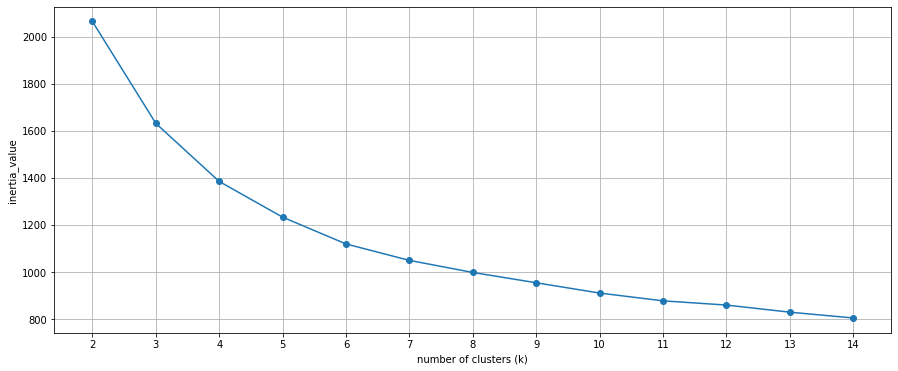

In [45]:
# Creating Elbow graph for determining best k value

k_range = range(2, 15) #ranging k
inertia = [] #creating an empty inertia list 

for k in k_range:
    # Creating an instance for kmeans with k clusters
    model = KMeans(n_clusters=k)
    
    # Fitting model to samples
    model.fit(scaled_df.iloc[:,0:])
    
    # Append the inertia to the inertia list
    inertia.append(model.inertia_)
    
# Plot k_range vs inertias
plt.figure(figsize=(15,6))
plt.plot(k_range, inertia, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia_value')
plt.xticks(k_range)
plt.grid(True)
plt.show()

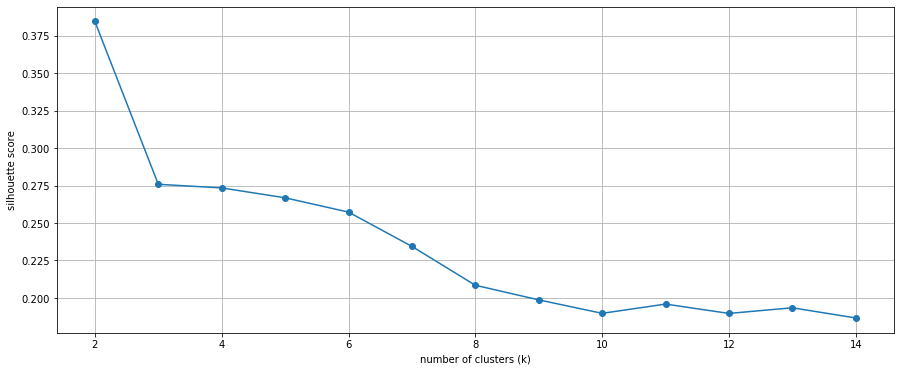

In [46]:
# Creating silhouette graph for determining best k value

#creating an empty list for silhouette score and number of clusters
silhouette=[] 

for k in range(2,15):
    #fitting scaled dataframe to kmeans algorithm
    kmeans=KMeans(n_clusters=k).fit(scaled_df.iloc[:,0:]) 
    
    #Appending K and silhouette score values to empty silhouette list
    silhouette.append([k,silhouette_score(scaled_df.iloc[:,0:],kmeans.labels_)])
    
#Plot k_range vs silhouette score 
plt.figure(figsize=(15,6))
plt.xlabel('number of clusters (k)')
plt.ylabel('silhouette score')
plt.plot(pd.DataFrame(silhouette)[0],pd.DataFrame(silhouette)[1],marker='o')
plt.grid(True)

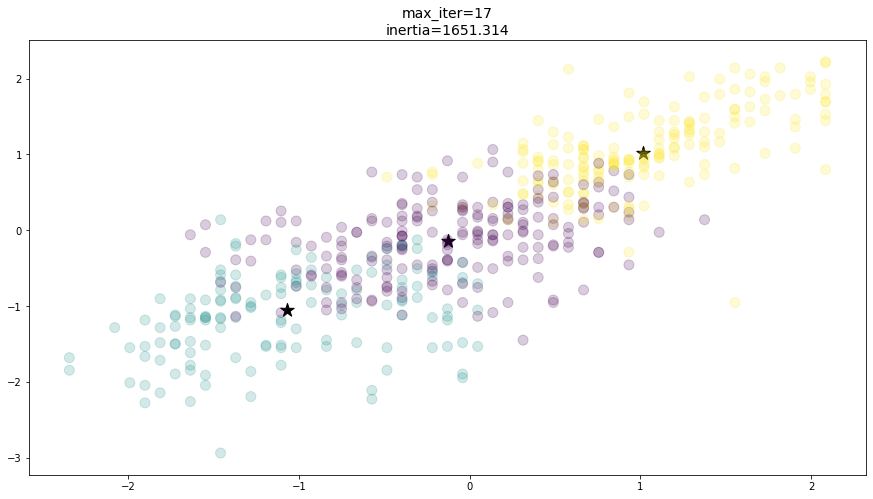

In [47]:
# Plotting the data with cluster centroids
plt.figure(figsize=(15,8))
kmeans=KMeans(n_clusters=3,init='random',n_init=1,random_state=8)
kmeans.fit(scaled_df)
labels= kmeans.labels_

#cluster centroids
centroids=kmeans.cluster_centers_ 
plt.scatter(centroids[:,0],centroids[:,1],c='k',s=200,marker='*')
plt.title('max_iter='+str(kmeans.n_iter_)+'\n'+'inertia='+str(kmeans.inertia_.round(3)),fontsize=14)# title
plt.scatter(x='GRE_Score',y='CGPA',data= scaled_df,c=labels, s= 100,alpha=.2)
plt.show()

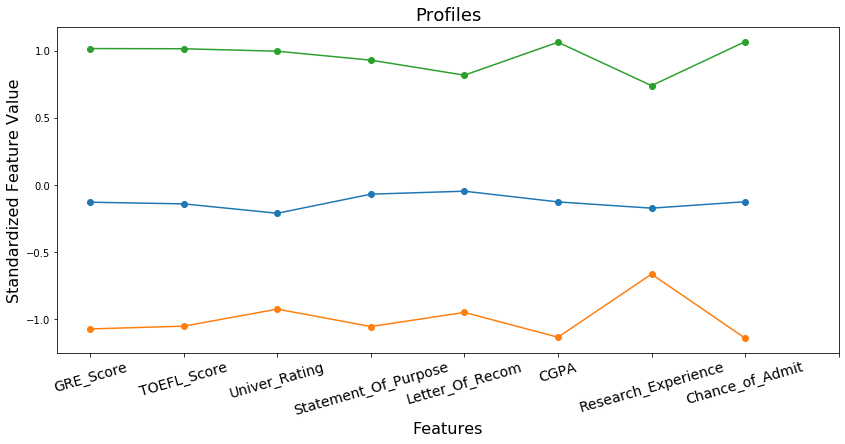

In [48]:
plt.figure(figsize=(14,6))
plt.plot(np.transpose(centroids),marker='o')
plt.xticks(np.arange(9),columns[0:],rotation = 16,fontsize=14)
plt.title('Profiles',fontsize=18)
plt.ylabel('Standardized Feature Value',fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.show()

In [49]:
# Create a KMeans instance with 3 clusters
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(scaled_df.iloc[:,0:8])

# Determining the labels for clusters of new_points
scaled_df['cluster'] = model.predict(scaled_df.iloc[:,0:8])

scaled_df.head()

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit,cluster
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107,0
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349,1
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340,1
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039,1
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797,2


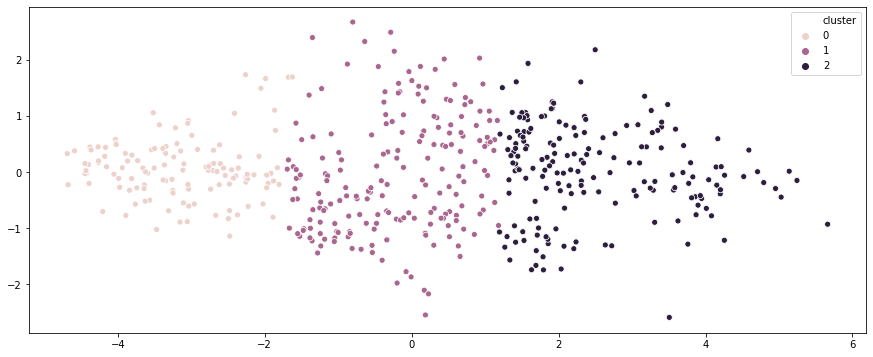

In [50]:
# Creating model for PCA instance
pca_model = PCA()

# Applying the fit_transform method of model to scaled data
featured_pca = pca_model.fit_transform(scaled_df.iloc[:,0:8])

# Assigning 0th column of featured_pca
X = featured_pca[:,0]

# Assigning 1st column of featured_pca
Y = featured_pca[:,1]

# Scatter plot X vs Y
plt.figure(figsize=(15,6))
sns.scatterplot(x=X, y=Y, hue="cluster", data=scaled_df)

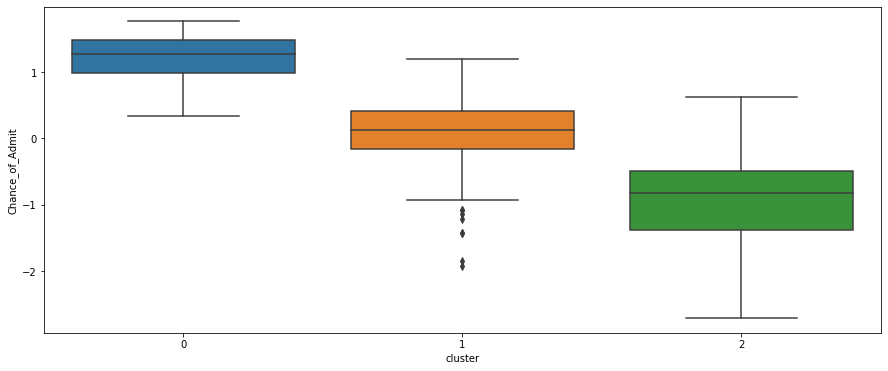

In [51]:
#creating boxplot for number of clusters and chance of admit
plt.figure(figsize=(15,6))
sns.boxplot(x="cluster", y="Chance_of_Admit", data=scaled_df )

In [52]:
#finding cluster centroids
centroids = model.cluster_centers_
scaled_df.iloc[:,0:10].groupby(['cluster']).mean()

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit
cluster,,,,,,,,
0,1.158791,1.179295,1.178532,1.097277,0.965886,1.239569,0.758497,1.226550
1,0.100055,0.075631,-0.024634,0.114518,0.132025,0.078280,0.133490,0.067895
2,-0.942151,-0.929353,-0.816009,-0.914383,-0.840015,-0.975483,-0.693191,-0.954480


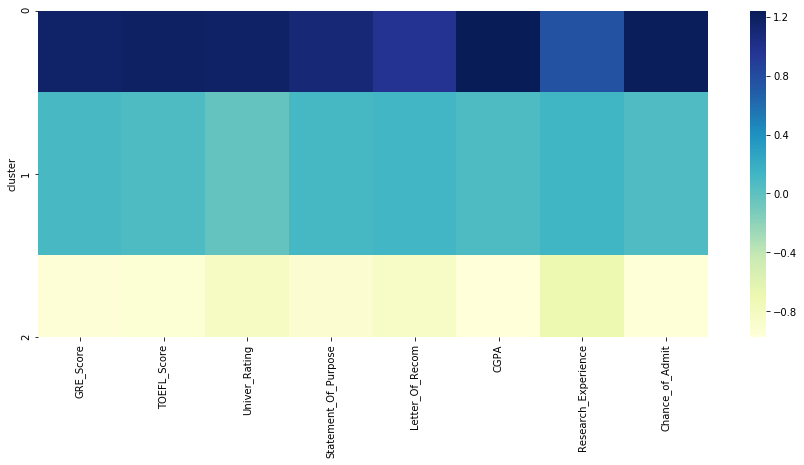

In [53]:
#creating heatmap for factors vs number of clusters
plt.figure(figsize=(15,6))
sns.heatmap(scaled_df.iloc[:,0:10].groupby(['cluster']).mean(), cmap="YlGnBu")

In [54]:
#counting cluster values
pd.DataFrame(scaled_df['cluster'].value_counts())

,cluster
1,198
2,176
0,126


In [55]:
df_centroids=pd.DataFrame(scaler_function.inverse_transform(kmeans.cluster_centers_),columns=columns[0:])
df_centroids.round({'GRE_Score':0,'TOEFL_Score':0,'Univer_Rating':0,'Statement_Of_Purpose':1, 'Letter_Of_Recom':1,'CGPA':2,'Research_Experience': 0,'Chance_of_Admit': 2})

,GRE_Score,TOEFL_Score,Univer_Rating,Statement_Of_Purpose,Letter_Of_Recom,CGPA,Research_Experience,Chance_of_Admit
0,315.0,106.0,3.0,3.3,3.4,8.50,0.0,0.70
1,304.0,101.0,2.0,2.3,2.6,7.89,0.0,0.56
2,328.0,113.0,4.0,4.3,4.2,9.22,1.0,0.87


## Model Analysis

In [46]:
import scipy.stats as stats

In [43]:
data = pd.DataFrame(result2.fittedvalues,columns=['preds'])
data['residuals'] = df.Chance_of_Admit - data.preds
data['sum_sq_res'] = data.residuals * data.residuals

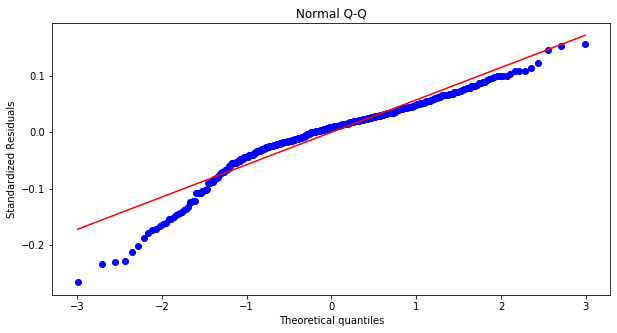

In [48]:
plt.figure(figsize=(10,5))
stats.probplot(data.residuals, dist="norm", plot=plt)
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q')
plt.savefig('QQ_Plot.png',dpi=100)
plt.show()

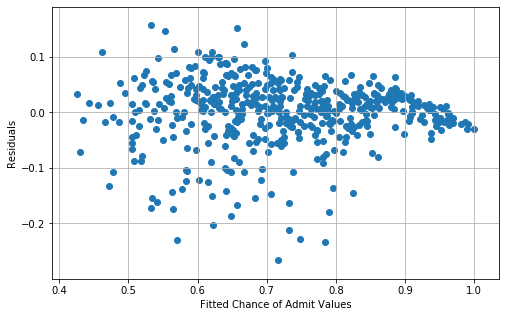

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(x = data.preds, y = data.residuals)
plt.xlabel('Fitted Chance of Admit Values')
plt.ylabel('Residuals')
plt.savefig('sc_plot.png',dpi=100)
plt.grid()
plt.show()